### Telco Churn Analysis

###### Dataset info : Sample Data set containing Telcom customer data and showing customers left last month

In [5]:
# First import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick  # it is used to show the Ticks
import matplotlib.pyplot as plt
%matplotlib inline     #it has been used for KDA plot Where the graph will not over lap

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Load the data file

In [3]:
telco_base_data =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


### look at top 5 records to dataset

In [4]:
telco_base_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
### check the various attributes of the data like (shape ,rows and columns, dataTypes)
telco_base_data.shape

(7043, 21)

In [7]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# check the dataTypes of the all columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# check the descriptive statistics of numeric values 
telco_base_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

75% customers have tensure less than 55 months

Average monthly charges are USD 64.76 where as 25% customers pay more then USD 89.85 per month

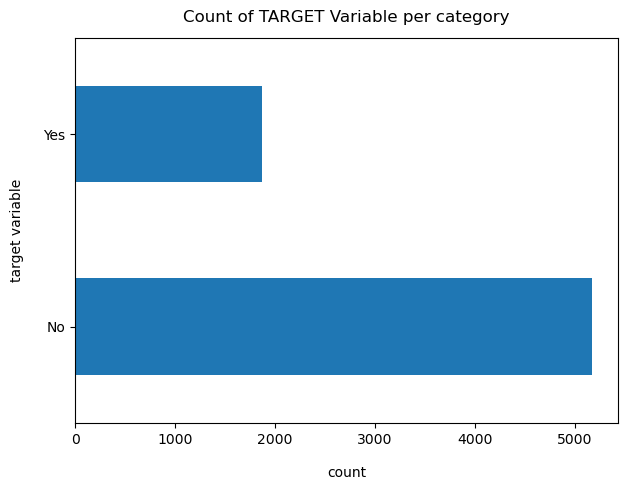

In [11]:
telco_base_data["Churn"].value_counts().plot(kind="barh",figsize=(7,5))
plt.xlabel("count",labelpad=14)
plt.ylabel("target variable",labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

In [12]:
100*telco_base_data["Churn"].value_counts()/len(telco_base_data["Churn"])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [13]:
telco_base_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio =73.27
* So we analyse the data with other features while taking the target values separately to get some insights

In [14]:
# Summary of the dataFrame, as we have too many columns
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning

1. Create a copy of base data for manupulation & processing

In [16]:
telco_data=telco_base_data.copy()

* here check the datatypes of the features and change them to there required datatype.

2. As here we can see Total Charges should be numeric amount. lets convert it to numerical data type

In [17]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors="coerce")

In [18]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column.lets check these records

In [20]:
telco_data.loc[telco_data["TotalCharges"].isnull()==True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

4. Missing value Treatment

* since the % of these records compared to total dataset is very low i.e 0.15%, it is safe to ignore them from further processing

                            or
                            
* hence we can replace null values with the mean/median/Mode. This method is simple and effective when the null values are missing at random and don’t have a significant impact on the overall distribution of the data.

In [21]:
## Removing missing values 

#  telco_data.dropna(how="any",inplace=True)

In [22]:
## Replacing the missing values with mean
#df [‘column_name’].fillna (df [‘column_name’].mean (), inplace=True)
telco_data["TotalCharges"].fillna (telco_data["TotalCharges"].mean(),inplace=True)

In [23]:
# so here we can see there are no null values present in the TotalCharges
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
telco_data.loc[telco_data["TotalCharges"].isnull()==True]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

5. removing the columns not required for processing

In [25]:
# Drop column customerID and tenure
telco_data.drop(columns=["customerID","tenure"],axis=1,inplace=True) # axis 1 represents columns
                                                                     # axis 0 represents rows

In [26]:
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  
0           Electronic check           29.85         29.85    No  
1               Mailed check           56.95       1889.50    No  
2               Mailed check           53.85        108.15   Yes  
3  Bank transfer (automatic)           42.30       1840.75    No  
4           Electronic check           70.70        151.65   Yes

## Data Exploration

1.Plot distibution of individual predictors by churn

### Univariate Analysis

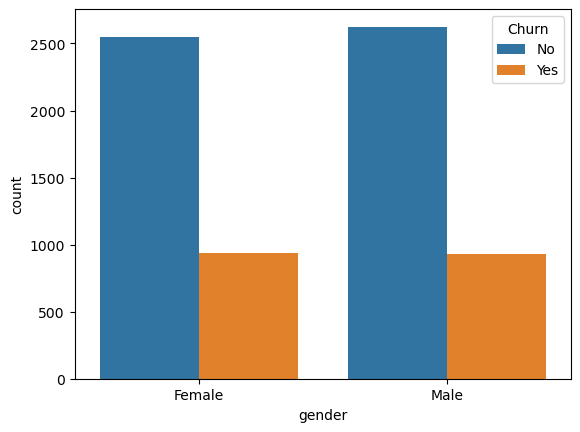

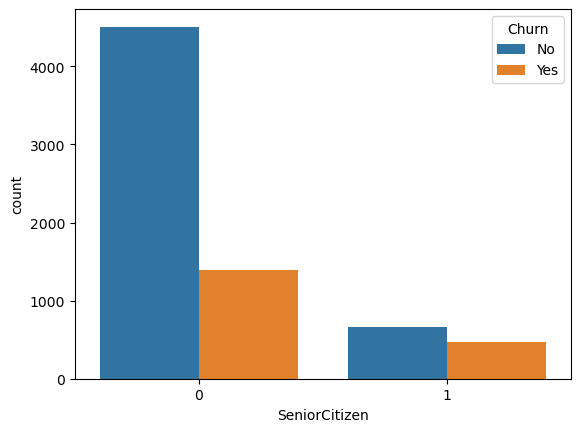

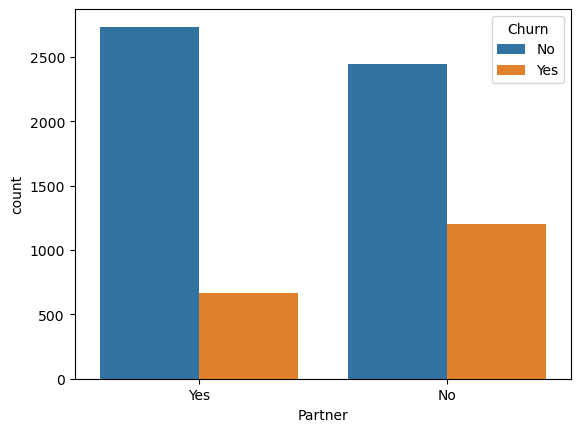

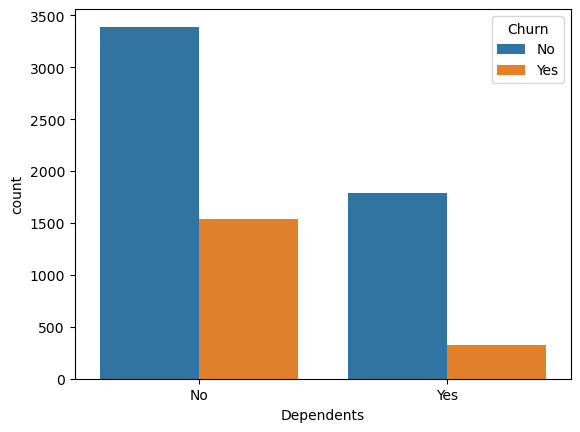

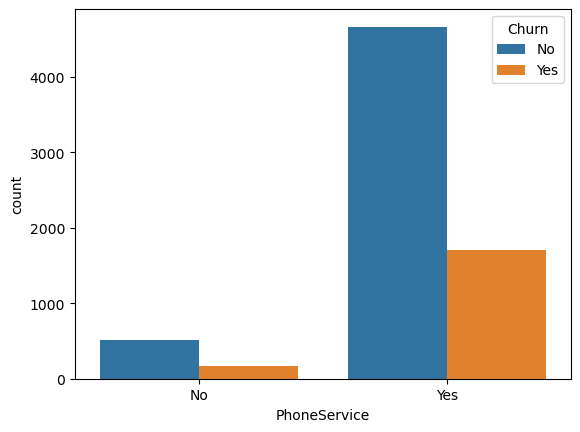

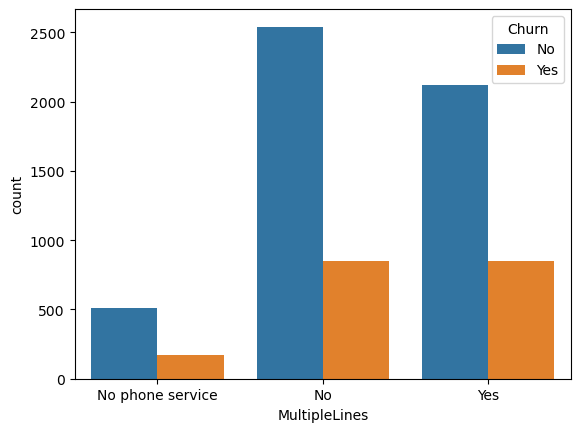

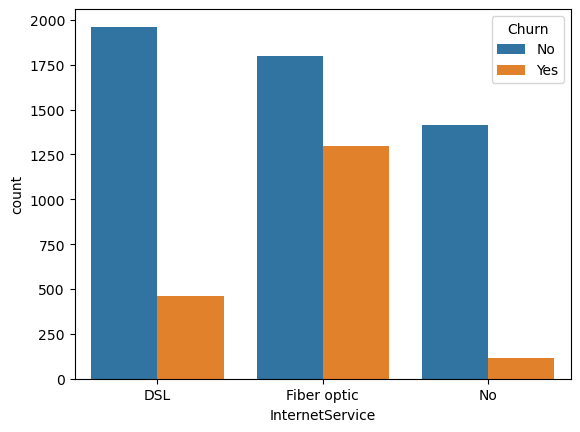

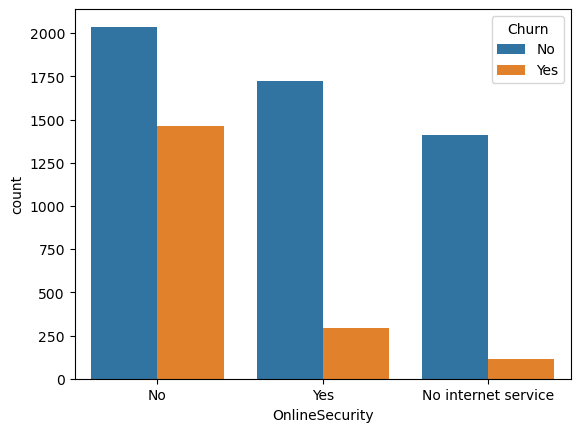

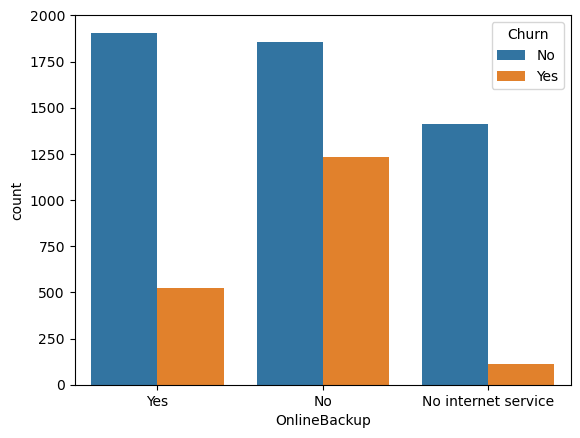

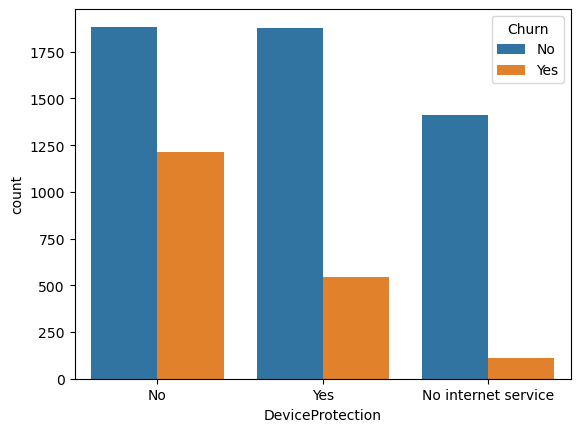

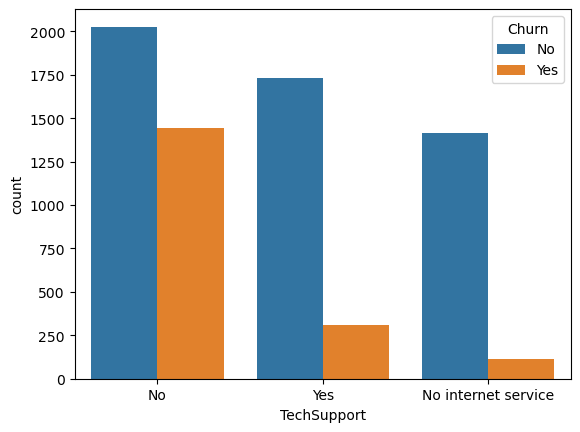

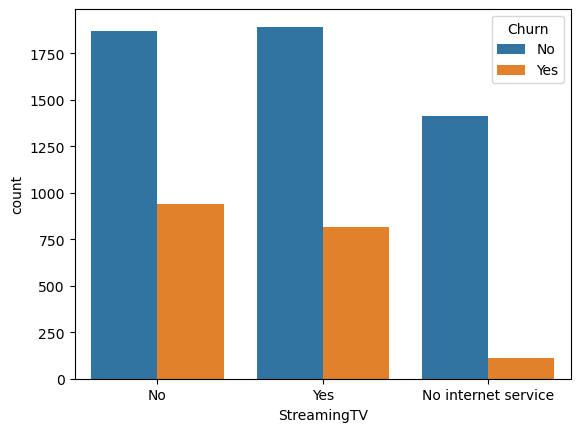

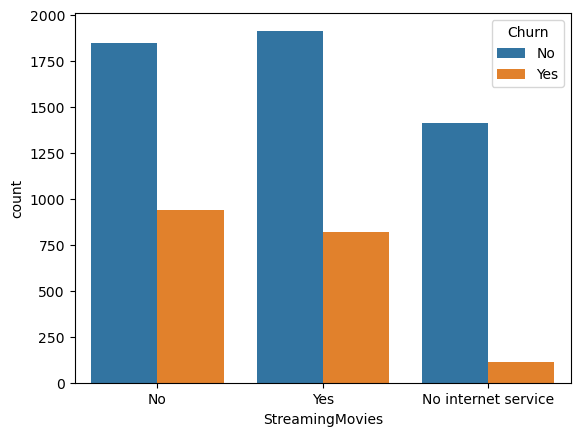

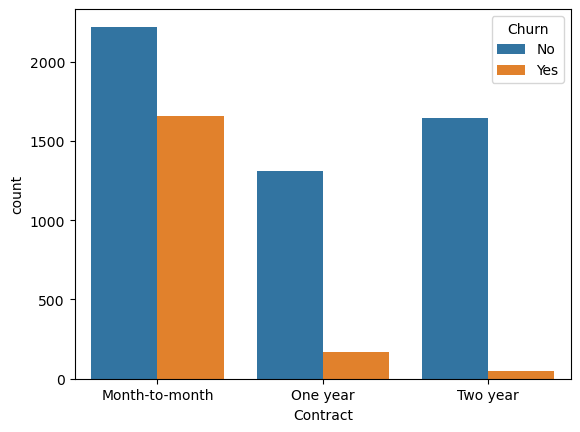

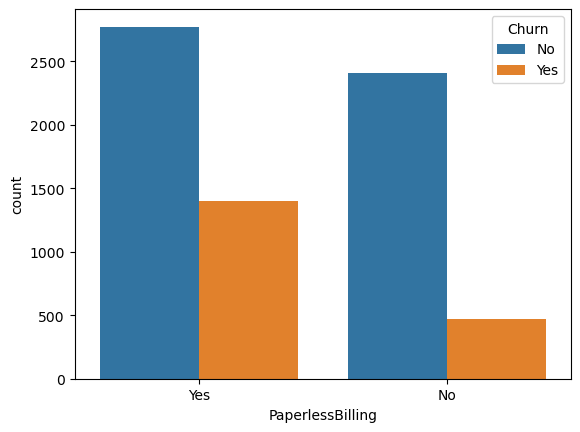

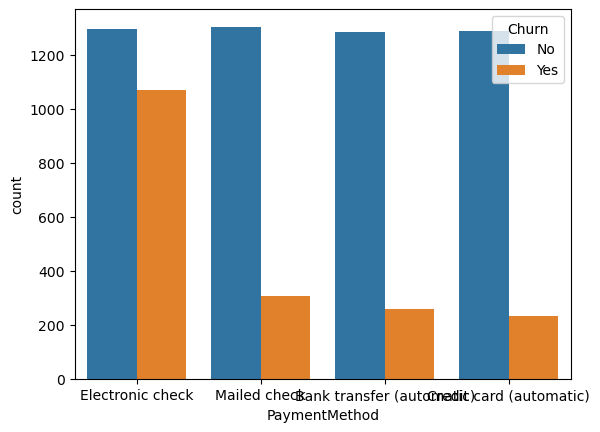

In [27]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

2.Convert the target variable "Churn" in binary numeric variable i.e yes=1; No=0


In [28]:
telco_data["Churn"]=np.where(telco_data.Churn=="Yes",1,0)

In [29]:
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0           Electronic check           29.85         29.85      0  
1               Mailed check           56.95       1889.50      0  
2               Mailed check           53.85        108.15      1  
3  Bank transfer (automatic)           42.30       1840.75      0  
4           Electronic check           70.70        151.65      1

3.Convet all the categhorical variable into dummy variable

In [30]:
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 45 columns]

4. Relationship between Monthly charges and total Charges

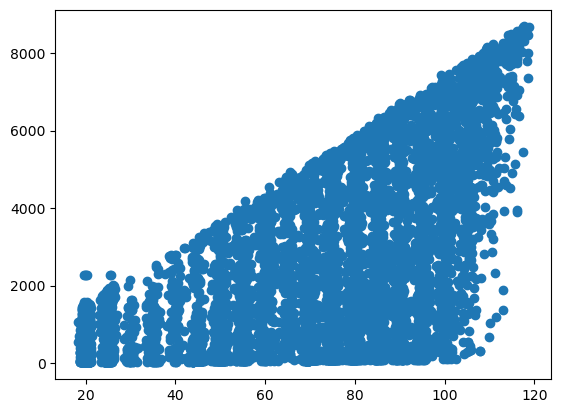

In [31]:
plt.scatter(data=telco_data_dummies,x="MonthlyCharges",y="TotalCharges")
plt.show()

**Insight:** Total Charges increases as monthly Chrages increases - as expected

5. churn by monthly charhes and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

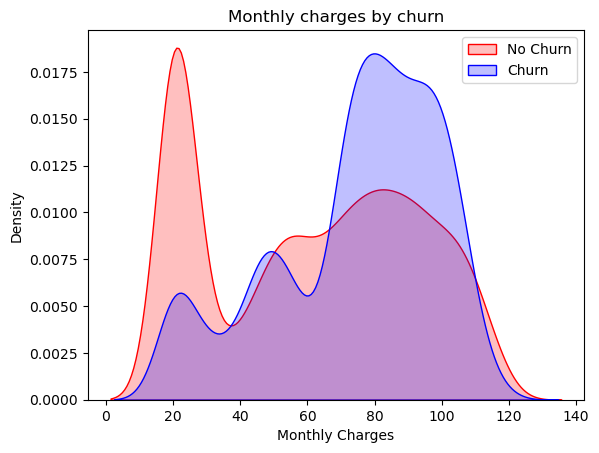

In [32]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** churn is high when monthly charges are high 

Text(0.5, 1.0, 'Total charges by churn')

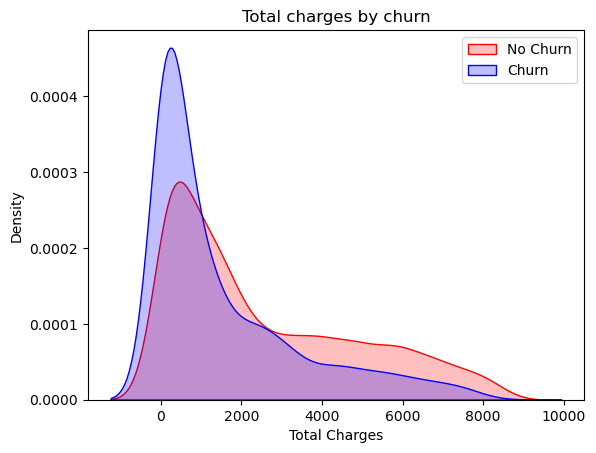

In [33]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight:** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors  **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

6.Build a coorelation of all predictors with "Churn"

<Axes: >

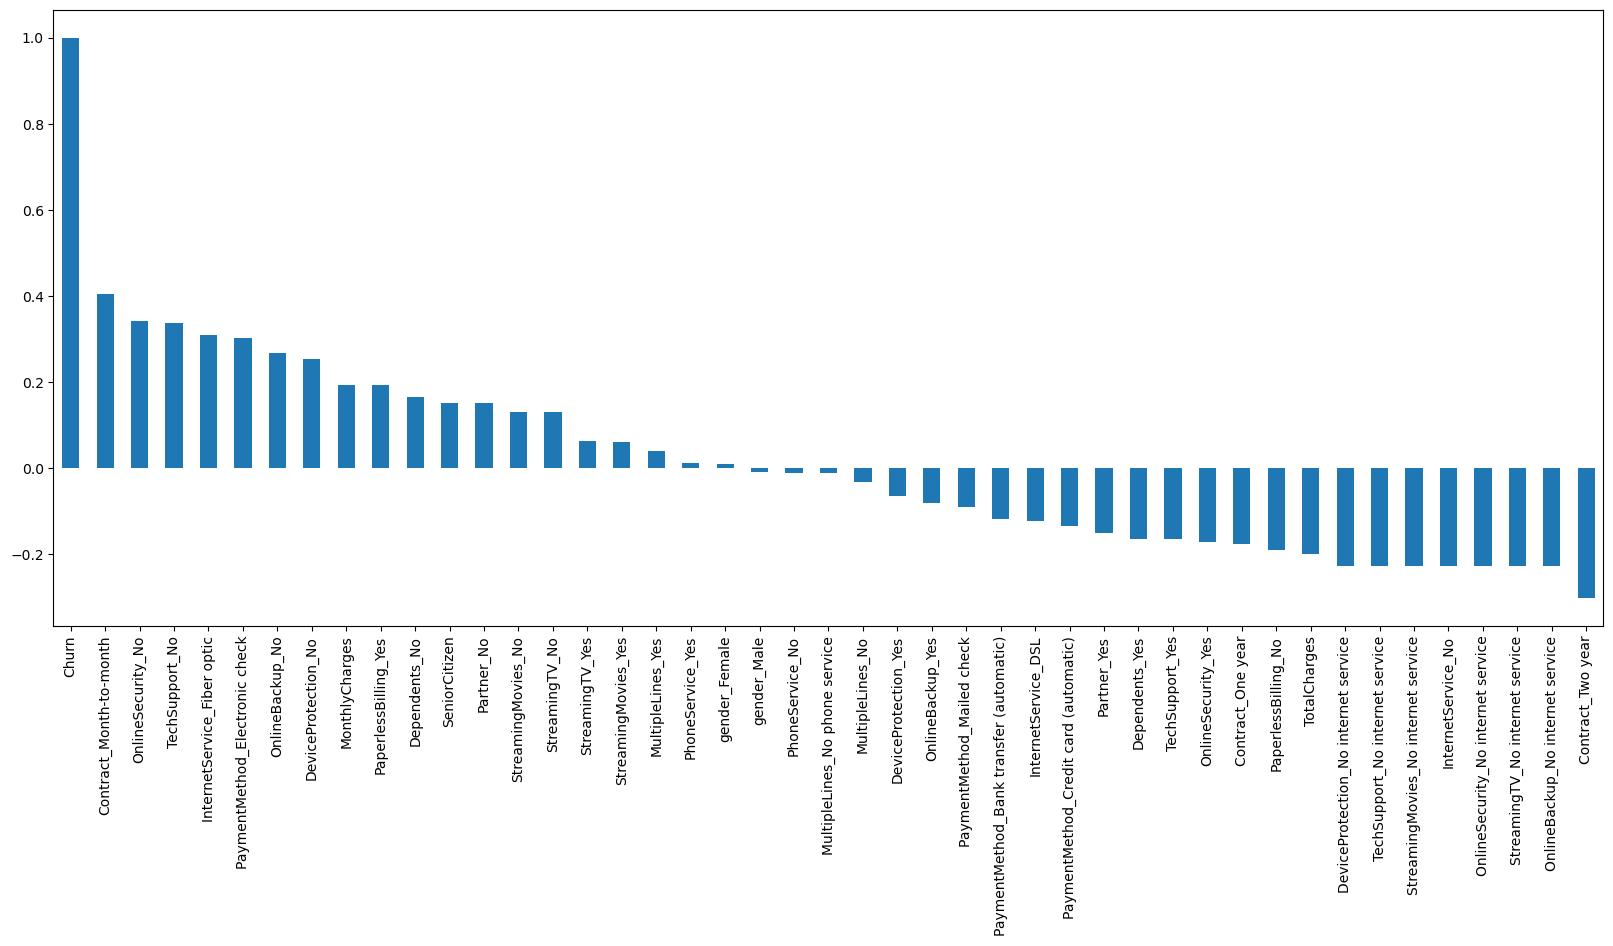

In [34]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seen in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and  of multiple lines have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

In [35]:
telco_data_dummies.corr()

SeniorCitizen  MonthlyCharges  \
SeniorCitizen                                 1.000000        0.220173   
MonthlyCharges                                0.220173        1.000000   
TotalCharges                                  0.102395        0.650468   
Churn                                         0.150889        0.193356   
gender_Female                                 0.001874        0.014569   
gender_Male                                  -0.001874       -0.014569   
Partner_No                                   -0.016479       -0.096848   
Partner_Yes                                   0.016479        0.096848   
Dependents_No                                 0.211185        0.113890   
Dependents_Yes                               -0.211185       -0.113890   
PhoneService_No                              -0.008576       -0.247398   
PhoneService_Yes                              0.008576        0.247398   
MultipleLines_No                             -0.136213       -0.338314   
MultipleLines_No phone service               -0.008576       -0.247398   
MultipleLines_Yes                             0.142948        0.490434   
InternetService_DSL                          -0.108322       -0.160189   
InternetService_Fiber optic                   0.255338        0.787066   
InternetService_No                           -0.182742       -0.763557   
OnlineSecurity_No                             0.185532        0.360898   
OnlineSecurity_No internet service           -0.182742       -0.763557   
OnlineSecurity_Yes                           -0.038653        0.296594   
OnlineBackup_No                               0.087952        0.210753   
OnlineBackup_No internet service             -0.182742       -0.763557   
OnlineBackup_Yes                              0.066572        0.441780   
DeviceProtection_No                           0.094810        0.171836   
DeviceProtection_No internet service         -0.182742       -0.763557   
DeviceProtection_Yes                          0.059428        0.482692   
TechSupport_No                                0.205620        0.322076   
TechSupport_No internet service              -0.182742       -0.763557   
TechSupport_Yes                              -0.060625        0.338304   
StreamingTV_No                                0.049062        0.016951   
StreamingTV_No internet service              -0.182742       -0.763557   
StreamingTV_Yes                               0.105378        0.629603   
StreamingMovies_No                            0.034210        0.018075   
StreamingMovies_No internet service          -0.182742       -0.763557   
StreamingMovies_Yes                           0.120176        0.627429   
Contract_Month-to-month                       0.138360        0.060165   
Contract_One year                            -0.046262        0.004904   
Contract_Two year                            -0.117000       -0.074681   
PaperlessBilling_No                          -0.156530       -0.352150   
PaperlessBilling_Yes                          0.156530        0.352150   
PaymentMethod_Bank transfer (automatic)      -0.016159        0.042812   
PaymentMethod_Credit card (automatic)        -0.024135        0.030550   
PaymentMethod_Electronic check                0.171718        0.271625   
PaymentMethod_Mailed check                   -0.153477       -0.377437   

                                         TotalCharges     Churn  \
SeniorCitizen                                0.102395  0.150889   
MonthlyCharges                               0.650468  0.193356   
TotalCharges                                 1.000000 -0.199428   
Churn                                       -0.199428  1.000000   
gender_Female                               -0.000048  0.008612   
gender_Male                                  0.000048 -0.008612   
Partner_No                                  -0.318812  0.150448   
Partner_Yes                                  0.318812 -0.150448   
Dependents_No                    

<Axes: >

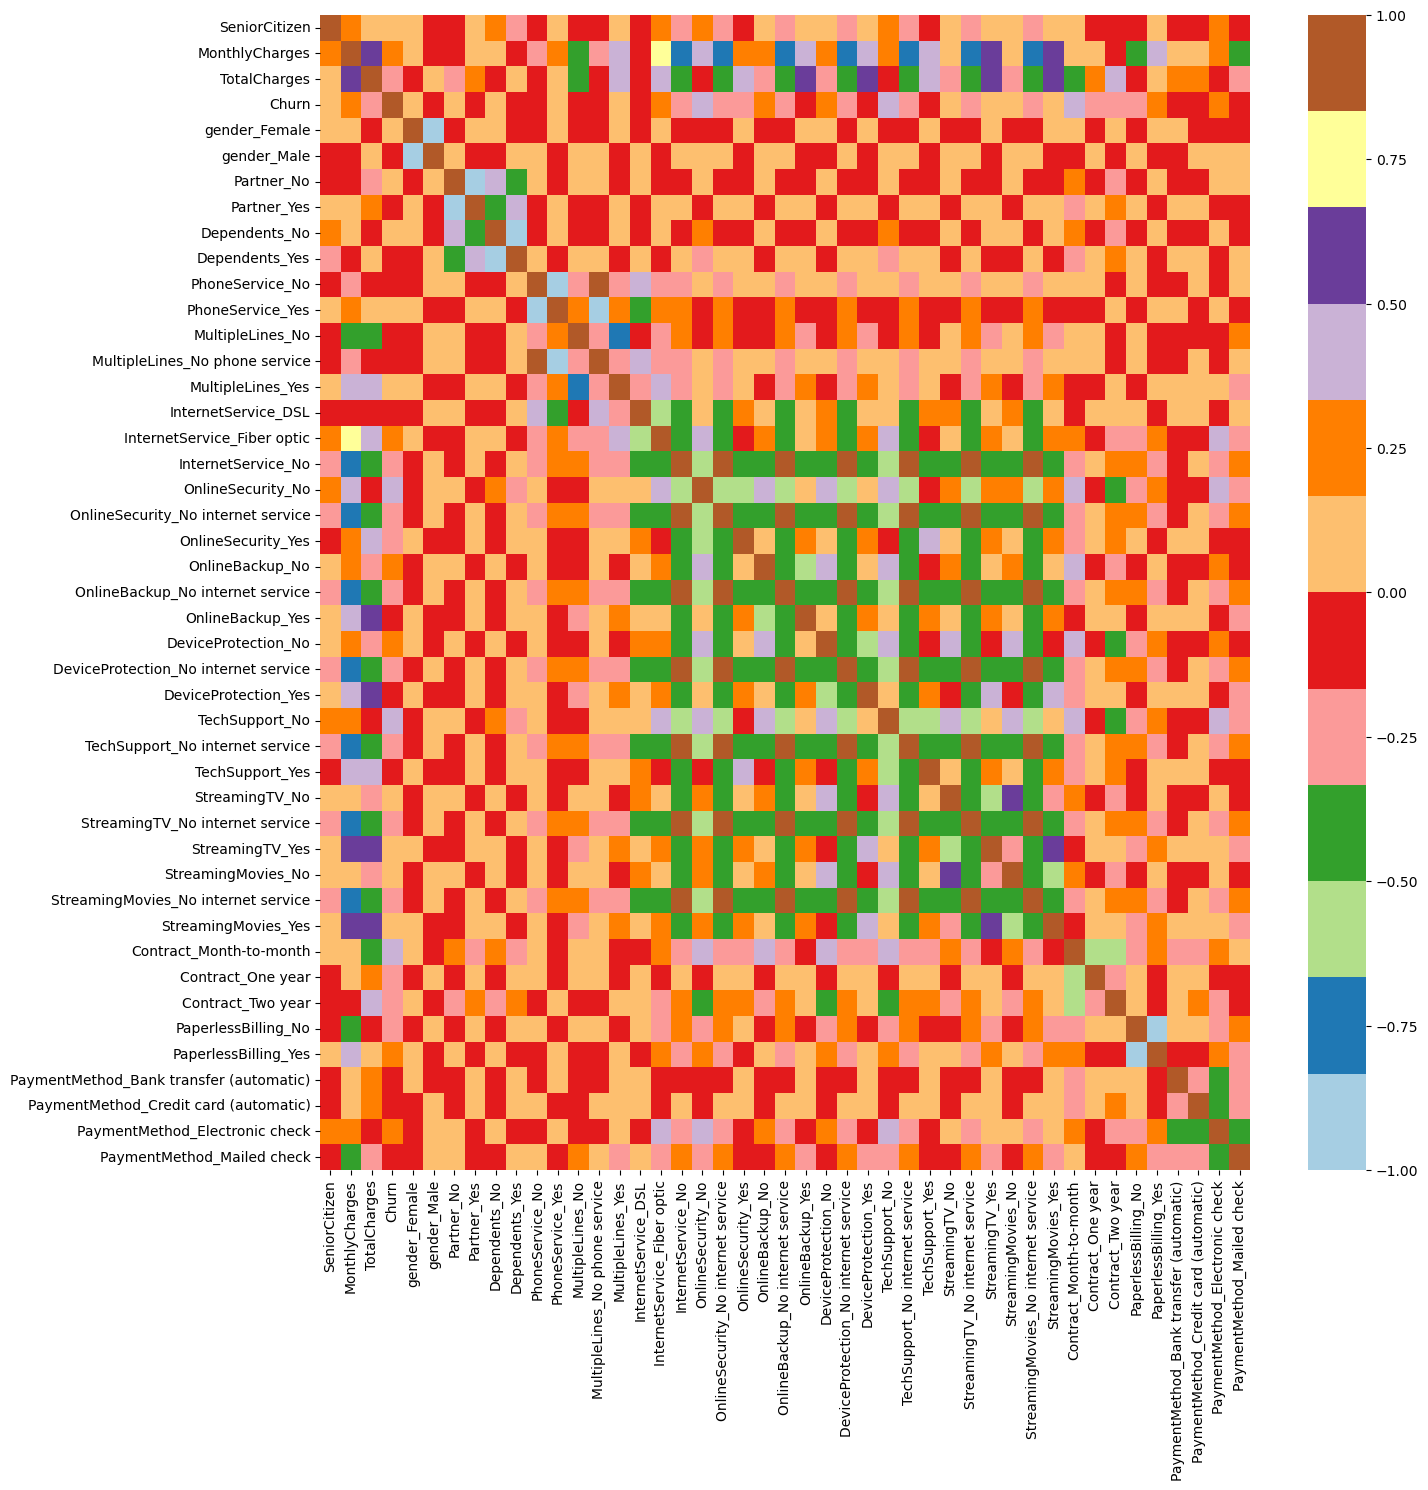

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(telco_data_dummies.corr(),cmap="Paired")

## Bivariate Analysis

In [37]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df2_target1=telco_data.loc[telco_data["Churn"]==1]

In [38]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

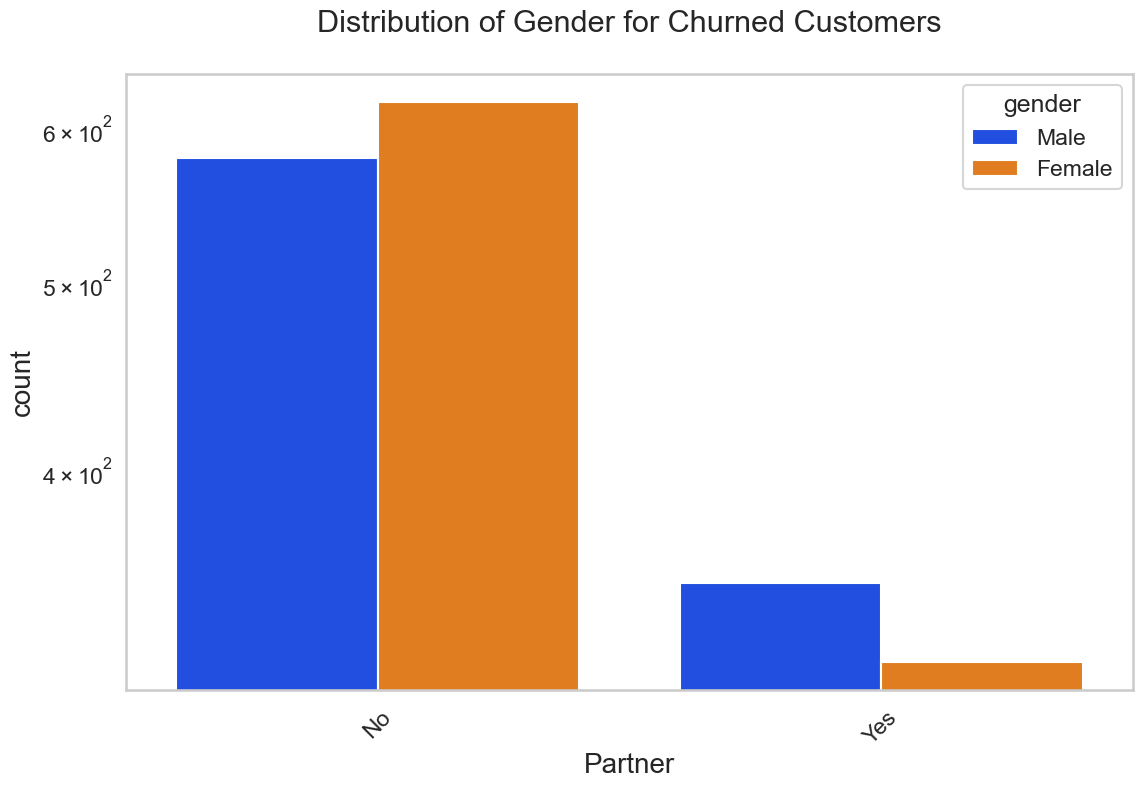

In [39]:
uniplot(new_df2_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

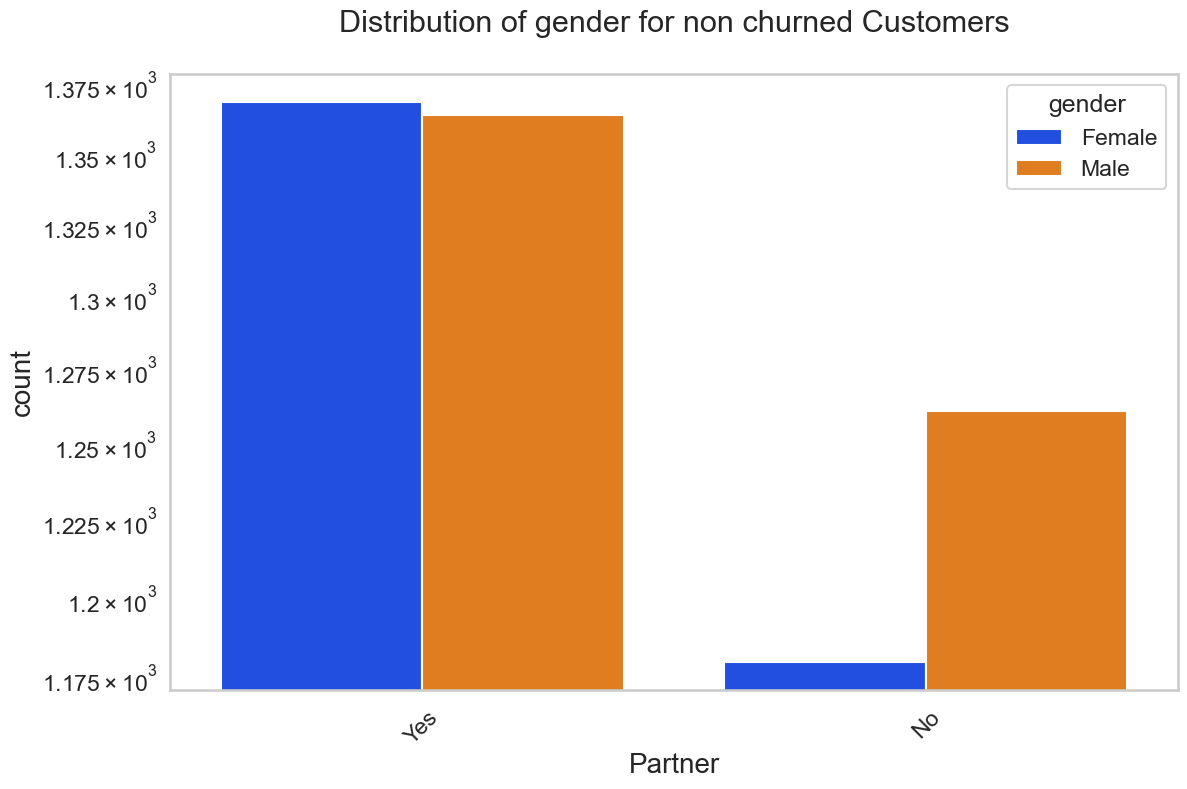

In [40]:
uniplot(new_df1_target0,col="Partner",title="Distribution of gender for non churned Customers",hue="gender")

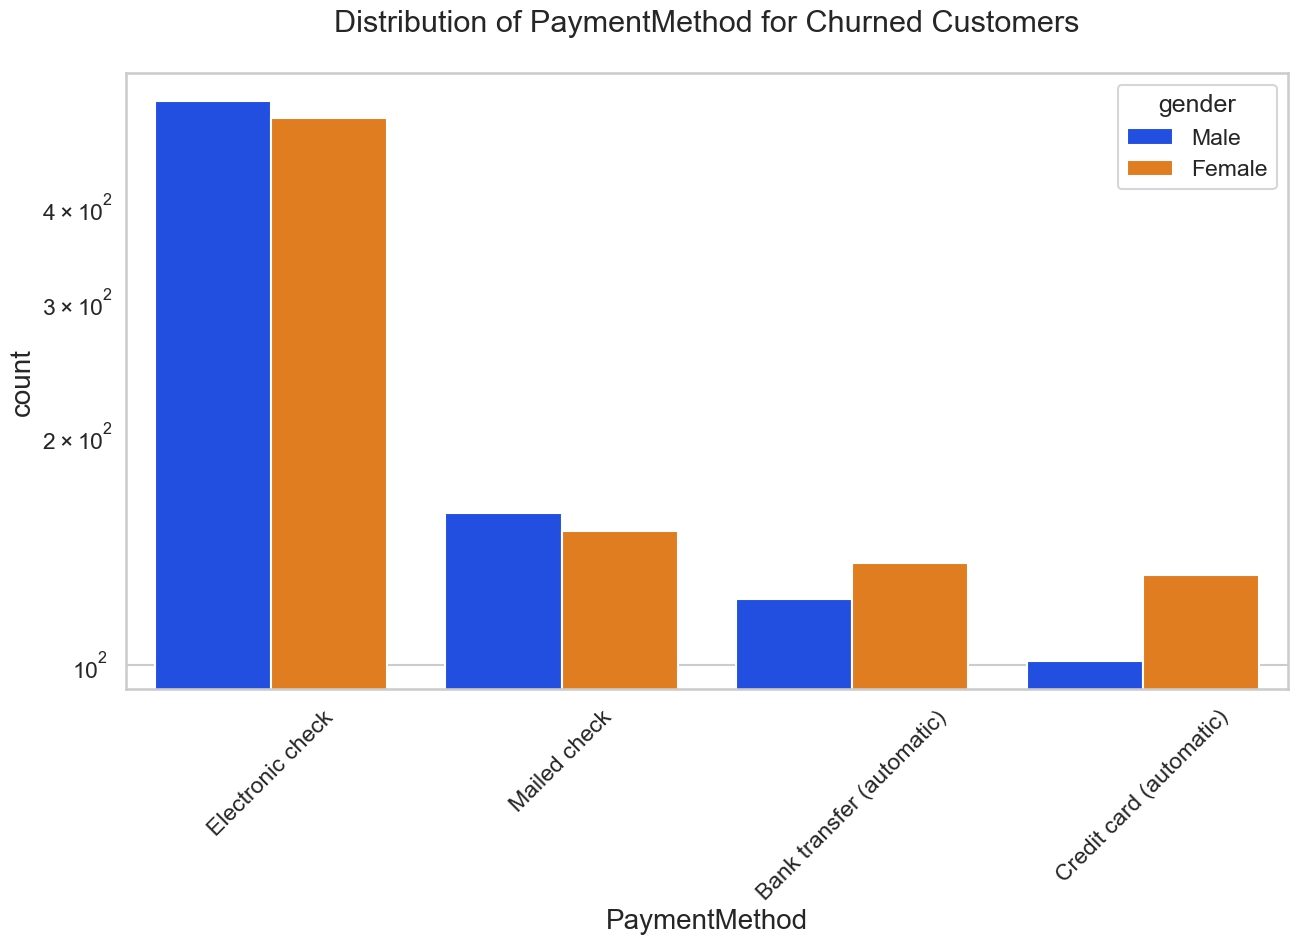

In [41]:
uniplot(new_df2_target1,col="PaymentMethod",title="Distribution of PaymentMethod for Churned Customers",hue="gender")

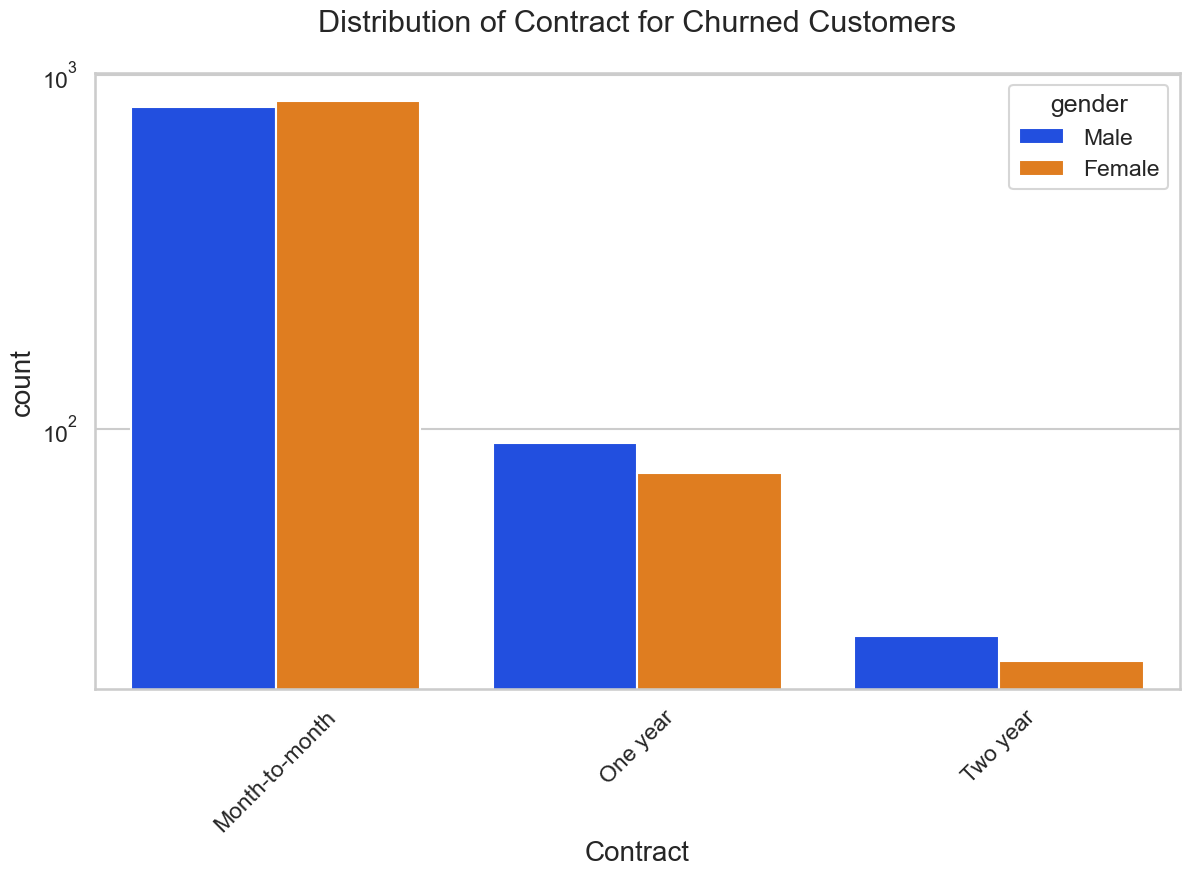

In [42]:
uniplot(new_df2_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

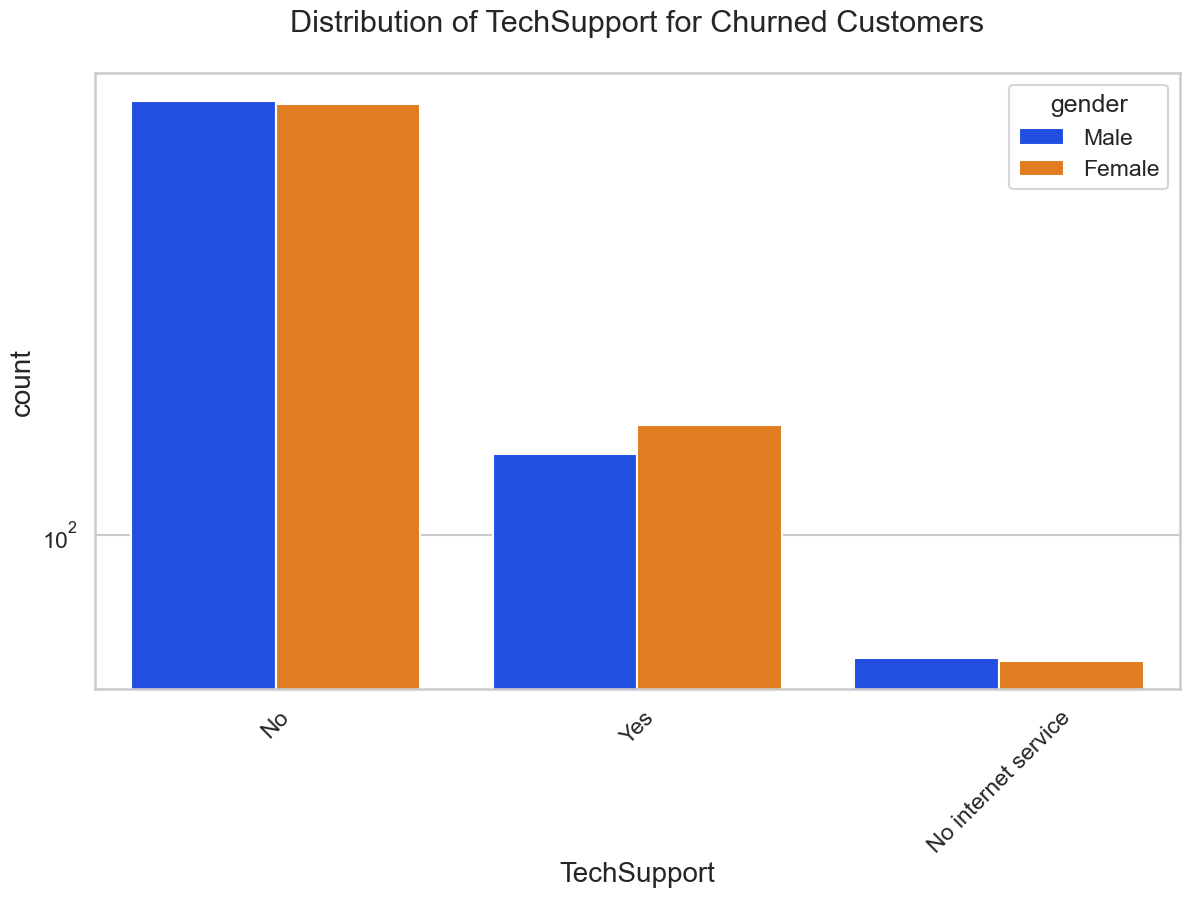

In [43]:
uniplot(new_df2_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

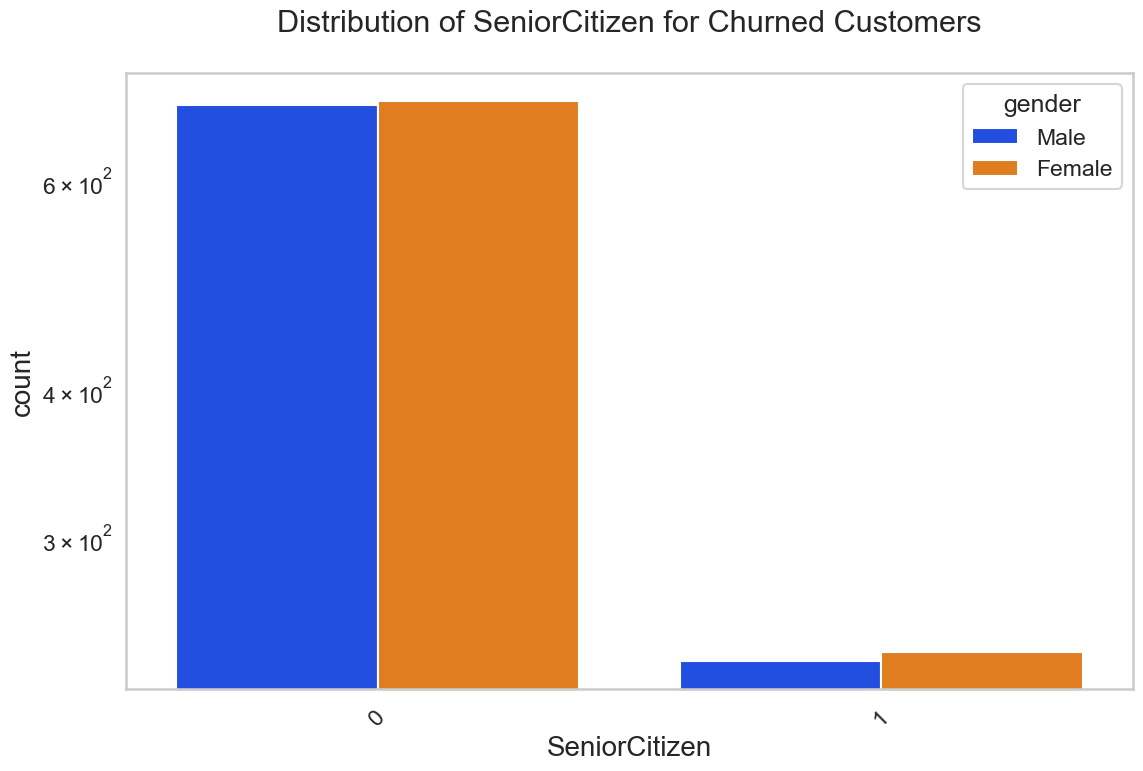

In [44]:
uniplot(new_df2_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Conclusion

In [ ]:
These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners
5. churn is high when monthly charges are high        
 
    

In [46]:
pip install ydata-profiling

In [47]:
import pandas as pd
import pandas_profiling as pp
from pandas_profiling import ProfileReport

In [48]:
profile = ProfileReport(telco_data_dummies)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
telco_data_dummies.to_csv("tel_churn.csv")